In [83]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
np.random.seed(10)

In [84]:
all_df = pd.read_table("data/SO_train.tsv", sep = "\t")
useful_df = all_df[(all_df != "?").all(axis=1)]
header = [x for x in useful_df]
cols = [header[-1]]+header[3:-1]
data_df = useful_df[cols]
df = pd.get_dummies(data=data_df, columns=['alchemy_category']).astype(float)
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]

In [85]:
train_df[:2]

,label,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,0.0,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [86]:
test_df[:2]

,label,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
19,1.0,0.585389,2.826772,0.669065,0.237410,0.064748,0.021583,0.562795,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.348995,3.355263,0.488372,0.290698,0.081395,0.023256,0.573826,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
print('total:',len(data_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 3566 train: 2851 test: 715


In [88]:
def PreprocessData(raw_df):
    ndarray = raw_df.values
    Label = ndarray[:, 0]
    Features = ndarray[:,1:]
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)
    return scaledFeatures,Label

In [89]:
train_Features,train_Label=PreprocessData(train_df)
train_Features.shape

(2851, 35)

In [90]:
test_Features,test_Label=PreprocessData(test_df)
test_Features.shape

(715, 35)

In [91]:
test_Features[:1]

array([[0.55045667, 0.04391268, 0.71243006, 0.31862931, 0.09612104,
        0.03204035, 0.02679977, 0.82352941, 0.        , 0.26868453,
        0.        , 0.37632351, 0.10842325, 0.        , 1.        ,
        0.55670103, 0.        , 0.01694588, 0.12685185, 0.5       ,
        0.17089279, 0.14347826, 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [92]:
train_Features[:1]

array([[0.77382544, 0.01272487, 0.67647059, 0.20946292, 0.04960254,
        0.02480127, 0.02113253, 0.91666667, 0.        , 0.2155878 ,
        0.        , 0.39591215, 0.0189412 , 0.        , 1.        ,
        0.24      , 0.        , 0.06336523, 0.05149299, 0.38095238,
        0.15294118, 0.07912957, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [93]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(units=40, input_dim=35, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=15, 
                         batch_size=30,verbose=2)

Train on 2565 samples, validate on 286 samples
Epoch 1/15
 - 0s - loss: 0.6831 - acc: 0.6253 - val_loss: 0.6448 - val_acc: 0.6713
Epoch 2/15
 - 0s - loss: 0.6102 - acc: 0.6756 - val_loss: 0.5726 - val_acc: 0.6958
Epoch 3/15
 - 0s - loss: 0.5942 - acc: 0.6834 - val_loss: 0.5606 - val_acc: 0.7203
Epoch 4/15
 - 0s - loss: 0.5901 - acc: 0.6936 - val_loss: 0.5566 - val_acc: 0.7238
Epoch 5/15
 - 0s - loss: 0.5858 - acc: 0.6975 - val_loss: 0.5535 - val_acc: 0.7308
Epoch 6/15
 - 0s - loss: 0.5844 - acc: 0.6901 - val_loss: 0.5552 - val_acc: 0.7203
Epoch 7/15
 - 0s - loss: 0.5858 - acc: 0.6904 - val_loss: 0.5515 - val_acc: 0.7273
Epoch 8/15
 - 0s - loss: 0.5802 - acc: 0.7025 - val_loss: 0.5571 - val_acc: 0.7028
Epoch 9/15
 - 0s - loss: 0.5784 - acc: 0.7041 - val_loss: 0.5478 - val_acc: 0.7378
Epoch 10/15
 - 0s - loss: 0.5762 - acc: 0.7057 - val_loss: 0.5517 - val_acc: 0.7273
Epoch 11/15
 - 0s - loss: 0.5765 - acc: 0.7041 - val_loss: 0.5453 - val_acc: 0.7273
Epoch 12/15
 - 0s - loss: 0.5744 - acc

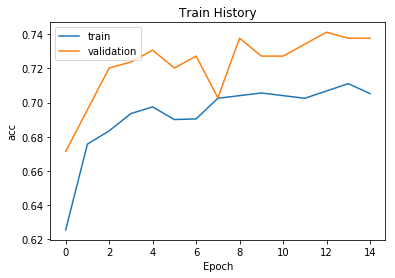

In [94]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(train_history,'acc','val_acc')

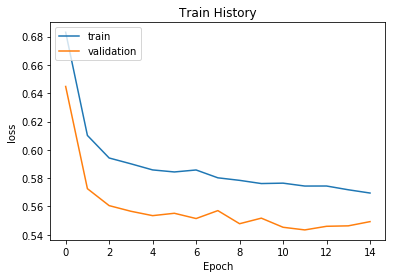

In [95]:
show_train_history(train_history,'loss','val_loss')

In [96]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)
scores[1]
#MLP準確率過低

715/715 [==============================] - 0s 21us/step


0.58741258774604